# CÁC THUẬT TOÁN PHÂN CỤM

## K-MEANS MODEL

###  1.1. Xây dựng chương trình từ numpy

#### Ví dụ 1

In [2]:
# Gọi các thư viện cần thiết
# Ta tự xây dựng phần k-means nên sẽ không gọi sklearn
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [3]:
np.random.seed(11)
# Kỳ vọng và hiệp phương sai của 3 cụm dữ liệu
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
# Số điểm mỗi cụm dữ liệu
N = 500
# Tạo các cụm dữ liệu qua phân bố chuẩn (Gaussian)
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# Tổng hợp dữ liệu từ các cụm
X = np.concatenate((X0, X1, X2), axis = 0)

# Số cụm = 3
K = 3

# Gán nhãn ban đầu cho các cụm, sau đó ta test model và so sánh
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

In [4]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

In [5]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [6]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [7]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [8]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==set([tuple(a) for a in new_centers]))

In [ ]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [10]:
(centers, labels, it) = kmeans(X, K)

Centers found by our algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


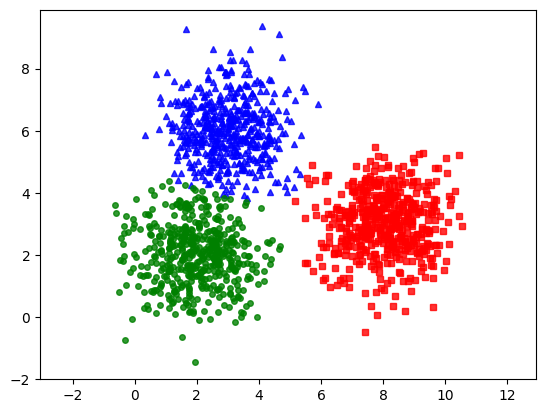

In [11]:
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])

### 1.2. Thực hiện bằng thư viện sklearn.

Centers found by scikit-learn:
[[1.97826939 2.00223913]
 [2.98759958 6.02896527]
 [8.0410628  3.02094748]]


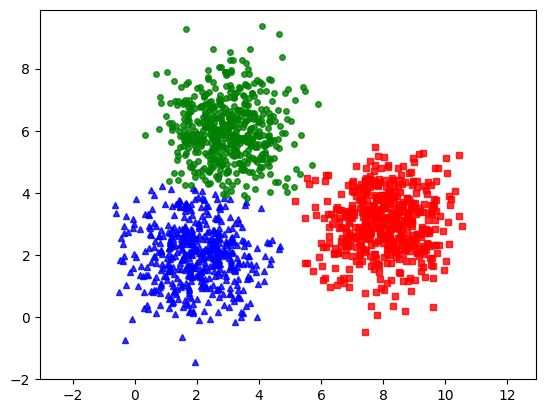

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

### Ví dụ 2

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [36]:
# This function visualizes filters in matrix A. Each column of A is a
# filter. We will reshape each column into a square image and visualizes
# on each cell of the visualization panel.
# All other parameters are optional, usually you do not need to worry
# about it.
# opt_normalize: whether we need to normalize the filter so that all of
# them can have similar contrast. Default value is true.
# opt_graycolor: whether we use gray as the heat map. Default is true.
# opt_colmajor: you can switch convention to row major for A. In that
# case, each row of A is a filter. Default value is false.
# source: https://github.com/tsaith/ufldl_tutorial

def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True
    # Rescale
    A = A - np.average(A)
    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)

    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))

    if not opt_graycolor:
        image *= 0.1
    
    k = 0

    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue
            clim = np.max(np.abs(A[:, k]))

            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz +buf):buf + j * (sz + buf) + sz] = A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz +
                buf):buf + j * (sz + buf) + sz] = A[:, k].reshape(sz, sz) / np.max(np.abs(A))
                k += 1

    return image

In [38]:
def display_color_network(A):
    """
    # display receptive field(s) or basis vector(s) for image patches
    #
    # A the basis, with patches as column vectors
    # In case the midpoint is not set at 0, we shift it dynamically
    :param A:
    :param file:
    :return:
    """
    if np.min(A) >= 0:
        A = A - np.mean(A)
    cols = np.round(np.sqrt(A.shape[1]))
    channel_size = A.shape[0] / 3
    dim = np.sqrt(channel_size)
    dimp = dim + 1
    rows = np.ceil(A.shape[1] / cols)
    B = A[0:channel_size, :]
    C = A[channel_size:2 * channel_size, :]
    D = A[2 * channel_size:3 * channel_size, :]
    B = B / np.max(np.abs(B))
    C = C / np.max(np.abs(C))
    D = D / np.max(np.abs(D))
    # Initialization of the image
    image = np.ones(shape=(dim * rows + rows - 1, dim * cols + cols - 1, 3))

    for i in range(int(rows)):
        for j in range(int(cols)):
            # This sets the patch
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 0] = B[:, i * cols+ j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 1] = C[:, i * cols+ j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 2] = D[:, i * cols+ j].reshape(dim, dim)
    image = (image + 1) / 2

    return image

In [43]:

import os
import numpy as np
import warnings

warnings.filterwarnings("ignore")

data_path = 'D:\\Machine Learning\\K-Mean\\data'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [45]:
def get_mnist_data(images_path, labels_path, num_images
, shuffle=False, _is=True, image_size=28):
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [ ]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)

X = train_images / 256.0
K = 10
kmeans = KMeans(n_clusters=K, random_state=42).fit(X)

pred_label = kmeans.predict(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<class 'numpy.ndarray'>
(784, 10)


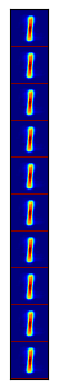

In [47]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)
f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')
# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())
# map the normalized data to colors
# image is now RGBA (512x512x4)
image = cmap(norm(A))

In [55]:

# import matplotlib.pyplot as plt
# import imageio

# imageio.imwrite('aa.png', image)

N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))
for k in range(K):
    Xk = X[pred_label == k, :]
    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(n_neighbors=N0).fit(Xk)
    dist, nearest_id = neigh.kneighbors(center_k, N0)
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]


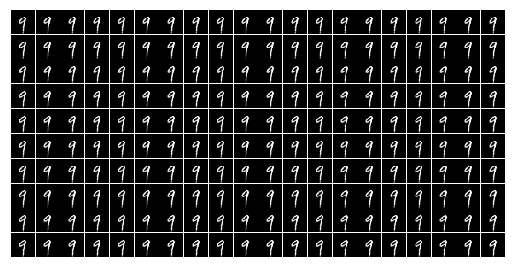

In [56]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

### Bài tập tự thực hành

#### Bài 1.1

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
warnings.filterwarnings('ignore')

# set names to the paths because they're too long
data_path = 'D:\\Machine Learning\\K-Mean\\data'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [3]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    
    labels = np.zeros((real_num)).astype(np.int64)
    
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    
    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
    
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels


In [4]:
train_images, train_labels = get_mnist_data(
    train_images_path, train_labels_path, 5000, shuffle=True)

test_images, test_labels = get_mnist_data(
    test_images_path, test_labels_path, 10000, _is=False, shuffle=True)

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


In [5]:
X0 = np.asarray(test_images)[:1000,:]/256.0
X = X0
K = 10

In [6]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [7]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [8]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
    # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [9]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [24]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

In [23]:
def kmeans_display_pca(X_reduced, label): 
    K = np.amax(label) + 1

    colors = ['go', 'ro', 'bo', 'co', 'mo', 'yo', 'ko', 'wo', 'g^', 'r^'] 

    plt.figure(figsize=(8, 8))
    for i in range(K):
        X_temp = X_reduced[label == i, :]
        
        plt.plot(X_temp[:, 0], X_temp[:, 1], colors[i % len(colors)], markersize = 4, alpha = .8, label=f'Cluster {i}')

    plt.title('K-Means Clustering of MNIST (PCA Reduced)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend() 
    plt.axis('equal')
    plt.grid(True, linestyle='--', alpha=0.6) 
    plt.show()

Centers found by our algorithm:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


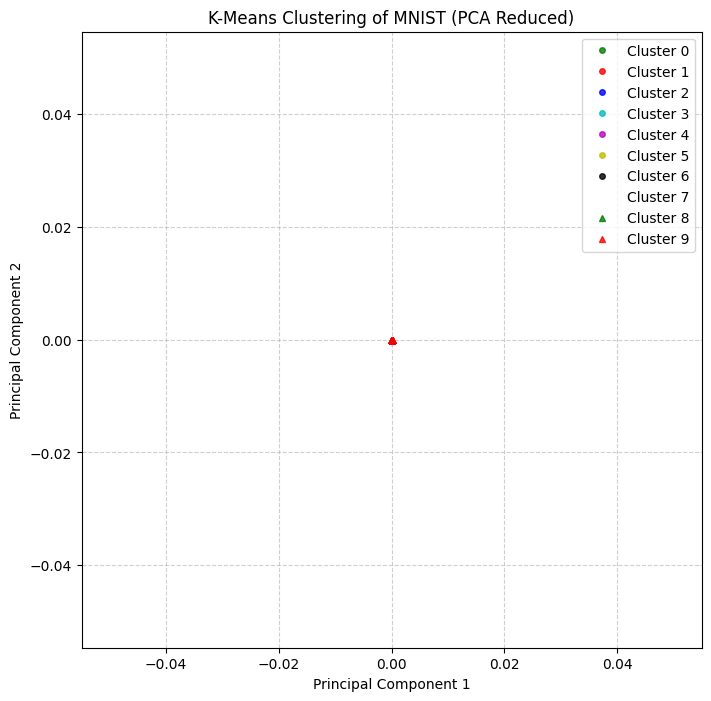

In [25]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])

kmeans_display_pca(X, labels[-1])

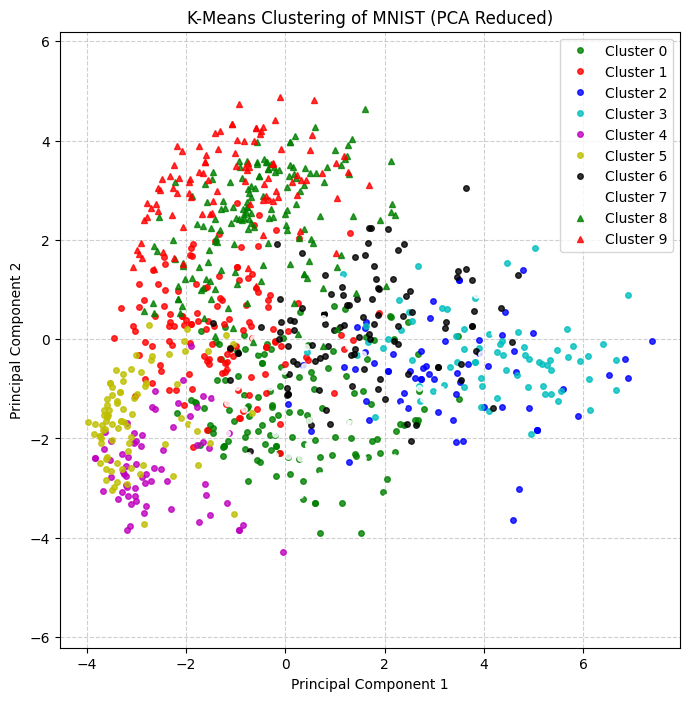

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
X_reduced = pca.fit_transform(X) 

kmeans_display_pca(X_reduced, labels[-1])

Centers found by scikit-learn:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


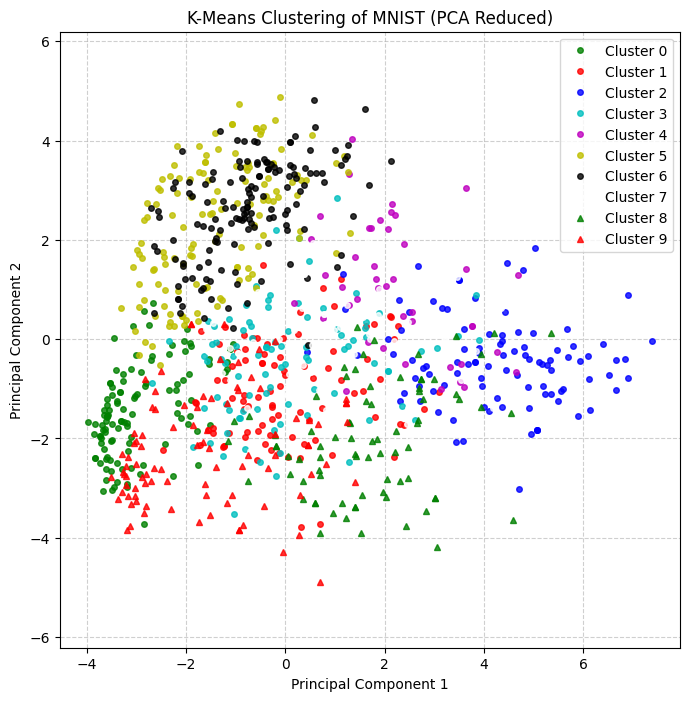

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)

pred_label = kmeans.predict(X)
kmeans_display_pca(X_reduced, pred_label)

#### Bài 1.2

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.spatial.distance import cdist
import cv2
from sklearn.preprocessing import StandardScaler

base_dir = "D:\\Machine Learning\\K-Mean\\data\\cats_and_dogs_filtered"
train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'validation/')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [27]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

validation_cat_fnames = os.listdir( validation_cats_dir )
validation_dog_fnames = os.listdir( validation_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [28]:
def get_data(file_dir, file_names, img_size = 28):
    image_data = []
    for file_name in file_names:
        img = cv2.imread(os.path.join(file_dir, file_name), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))  
            image_data.append(img.flatten())
    return pd.DataFrame(image_data)

In [29]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0]
    X1 = X[label == 1]
    X2 = X[label == 2]
    plt.plot(X0["x1"], X0["x2"], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1["x1"], X1["x2"], 'go', markersize = 4, alpha = .8)
    plt.plot(X2["x1"], X2["x2"], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

In [30]:
X_train = pd.concat((get_data(train_cats_dir, train_cat_fnames), get_data(train_dogs_dir, train_dog_fnames)))

In [31]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X.iloc[label == 0, :]
    X1 = X.iloc[label == 1, :]
    X2 = X.iloc[label == 2, :]
    plt.plot(X0.iloc[:, 0], X0.iloc[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1.iloc[:, 0], X1.iloc[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2.iloc[:, 0], X2.iloc[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

In [32]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X.iloc[np.random.choice(X.shape[0], k, replace=False)]

In [33]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [34]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X.iloc[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [35]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in np.array(centers)]) ==
    set([tuple(a) for a in new_centers]))

In [36]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[145.13340228 145.9803516  147.57187177 ... 149.93898656 146.65977249
  144.88004137]
 [ 78.45304937  80.63407551  82.68441433 ...  97.63504356  96.27202323
   93.53727009]]


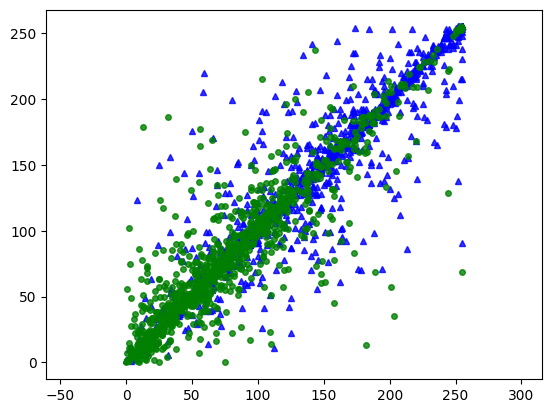

In [37]:
K = 2

(centers, labels, it) = kmeans(X_train, K)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X_train, labels[-1])

## MÔ HÌNH DBSCAN

### Ví dụ 2.1

In [14]:
import numpy as np
from matplotlib import pyplot as plt

class DBSCAN(object):

    def __init__(self,x,epsilon,minpts):
        # The number of input dataset
        self.n = len(x)
        # Euclidean distance
        p, q = np.meshgrid(np.arange(self.n), np.arange(self.n))
        self.dist = np.sqrt(np.sum(((x[p] - x[q])**2),2))
        # label as visited points and noise
        self.visited = np.full((self.n), False)
        self.noise = np.full((self.n),False)
        # DBSCAN Parameters
        self.epsilon = epsilon
        self.minpts = minpts
        # Cluseter
        self.idx = np.full((self.n),0)
        self.C = 0
        self.input = x

    def run(self):
        # Clustering
        for i in range(len(self.input)):
            if self.visited[i] == False:
                self.visited[i] = True
                self.neighbors = self.regionQuery(i)
                if len(self.neighbors) >= self.minpts:
                    self.C += 1
                    self.expandCluster(i)
                else : self.noise[i] = True
        return self.idx,self.noise

    def regionQuery(self, i):
        g = self.dist[i,:] < self.epsilon
        Neighbors = np.where(g)[0].tolist()
        return Neighbors

    def expandCluster(self, i):
        self.idx[i] = self.C
        k = 0
       
        while True:
            if len(self.neighbors) <= k:return
            j = self.neighbors[k]
            if self.visited[j] != True:
                self.visited[j] = True

                self.neighbors2 = self.regionQuery(j)
                v = [self.neighbors2[i] for i in np.where(self.idx[self.neighbors2]==0)[0]]

                if len(self.neighbors2) >=  self.minpts:
                    self.neighbors = self.neighbors+v

            if self.idx[j] == 0 : self.idx[j] = self.C
            k += 1

    def sort(self):
        
        cnum = np.max(self.idx)
        self.cluster = []
        self.noise = []
        for i in range(cnum):
           
            k = np.where(self.idx == (i+1))[0].tolist()
            self.cluster.append([self.input[k,:]])
       
        self.noise = self.input[np.where(self.idx == 0)[0].tolist(),:]
        return self.cluster, self.noise

    def plot(self):
        
        self.sort()
        fig,ax = plt.subplots()
        
        for idx,group in enumerate(self.cluster):
        
            ax.plot(group[0][:,0],
                    group[0][:,1],
                    marker='o',
                    linestyle='',
                    label='Cluster {}'.format(idx))

            if self.noise != None:
                ax.plot(self.noise[:,0],
                    self.noise[:,1],
                    marker='x',
                    linestyle='',
                    label='noise')

        ax.legend(fontsize=10, loc='upper left')
        plt.title('Scatter Plot of Clustering result', fontsize=15)
        plt.xlabel('X', fontsize=14)
        plt.ylabel('Y', fontsize=14)
        plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16924\4019189338.py:85: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if self.noise != None:


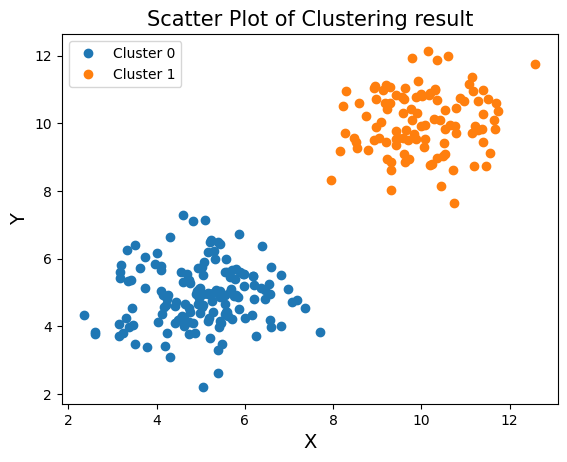

In [16]:
from scipy import io
import pandas as pd

# Load data
df = pd.read_csv('D:\\Machine Learning\\K-Mean\\data\\input.csv')
x = np.zeros([len(df), 2], float )
x[:, 0] = np.array(df['x1'], float)
x[:, 1] = np.array(df['x2'], float)
#%% Run DEMO
# INIT DBSCAN
dbscan = DBSCAN(x,1.5,4)
# CLUSTERING
idx,noise = dbscan.run()
# SORTING
g_cluster,n_cluster = dbscan.sort()
# Visualization
dbscan.plot()

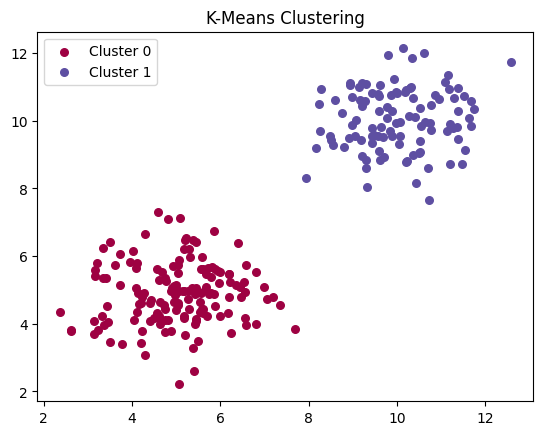

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(x)

plt.subplot()
unique_labels_kmeans = np.unique(kmeans_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_kmeans)))

for label, color in zip(unique_labels_kmeans, colors):
    plt.scatter(x[kmeans_labels == label][:, 0], x[kmeans_labels == label][:, 1], color=color, s=30, label=f'Cluster {label}')

plt.title('K-Means Clustering')
plt.legend()


## Bài tập tự thực hành

### Bài tập 2.1

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
path = 'D:\\Machine Learning\\K-Mean\data\\input.csv'

data = pd.read_csv(path)
data.head()

,x1,x2
0,5.954795,5.550627
1,5.558277,5.608027
2,3.141703,4.069789
3,4.986940,5.135376
4,5.402934,2.604591


In [40]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0]
    X1 = X[label == 1]
    plt.plot(X0["x1"], X0["x2"], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1["x1"], X1["x2"], 'go', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

Centers found by scikit-learn:
[[ 5.02487793  4.89668156]
 [10.01018716 10.04928426]]


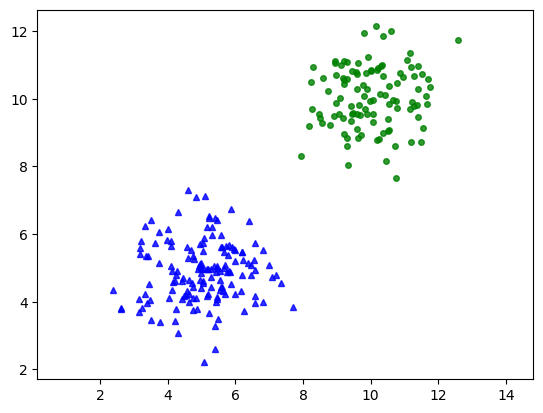

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)

pred_label = kmeans.predict(data)
kmeans_display(data, pred_label)

### Bài tập 2.2

In [42]:
from scipy import io
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [43]:
class DBSCAN(object):

    def __init__(self,x,epsilon,minpts):
        # The number of input dataset
        self.n = len(x)
        # Euclidean distance
        p, q = np.meshgrid(np.arange(self.n), np.arange(self.n))
        self.dist = np.sqrt(np.sum(((x[p] - x[q])**2),2))
        # label as visited points and noise
        self.visited = np.full((self.n), False)
        self.noise = np.full((self.n),False)
        # DBSCAN Parameters
        self.epsilon = epsilon
        self.minpts = minpts
        # Cluseter
        self.idx = np.full((self.n),0)
        self.C = 0
        self.input = x

    def run(self):
        # Clustering
        for i in range(len(self.input)):
            if self.visited[i] == False:
                self.visited[i] = True
                self.neighbors = self.regionQuery(i)
                if len(self.neighbors) >= self.minpts:
                    self.C += 1
                    self.expandCluster(i)
                else : self.noise[i] = True
        return self.idx,self.noise

    def regionQuery(self, i):
        g = self.dist[i,:] < self.epsilon
        Neighbors = np.where(g)[0].tolist()
        return Neighbors

    def expandCluster(self, i):
        self.idx[i] = self.C
        k = 0
       
        while True:
            if len(self.neighbors) <= k:return
            j = self.neighbors[k]
            if self.visited[j] != True:
                self.visited[j] = True

                self.neighbors2 = self.regionQuery(j)
                v = [self.neighbors2[i] for i in np.where(self.idx[self.neighbors2]==0)[0]]

                if len(self.neighbors2) >=  self.minpts:
                    self.neighbors = self.neighbors+v

            if self.idx[j] == 0 : self.idx[j] = self.C
            k += 1

    def sort(self):
        
        cnum = np.max(self.idx)
        self.cluster = []
        self.noise = []
        for i in range(cnum):
           
            k = np.where(self.idx == (i+1))[0].tolist()
            self.cluster.append([self.input[k,:]])
       
        self.noise = self.input[np.where(self.idx == 0)[0].tolist(),:]
        return self.cluster, self.noise
    
    def plot(self):
        
        self.sort()
        fig,ax = plt.subplots()
        
        for idx,group in enumerate(self.cluster):
        
            ax.plot(group[0][:,0],
                    group[0][:,1],
                    marker='o',
                    linestyle='',
                    label='P{}'.format(idx))

        if self.noise is not None and self.noise.size > 0:
            ax.plot(self.noise[:,0],
                self.noise[:,1],
                marker='x',
                linestyle='',
                label='noise')

        ax.legend(fontsize=10, loc='upper left')
        plt.title('Scatter Plot of Clustering result', fontsize=15)
        plt.xlabel('X', fontsize=14)
        plt.ylabel('Y', fontsize=14)
        plt.show()


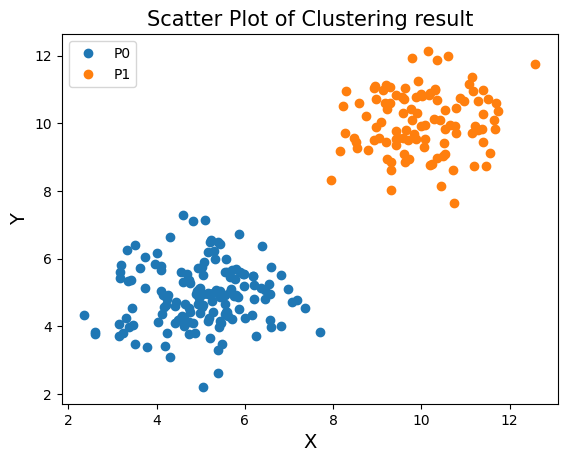

In [45]:
# Load data
df = pd.read_csv('D:\\Machine Learning\\K-Mean\\data\\input.csv')
x = np.zeros([len(df), 2], float )
x[:, 0] = np.array(df['x1'], float)
x[:, 1] = np.array(df['x2'], float)
#%% Run DEMO
# INIT DBSCAN
dbscan = DBSCAN(x,1.5,4)
# CLUSTERING
idx,noise = dbscan.run()
# SORTING
g_cluster,n_cluster = dbscan.sort()
# Visualization
dbscan.plot()

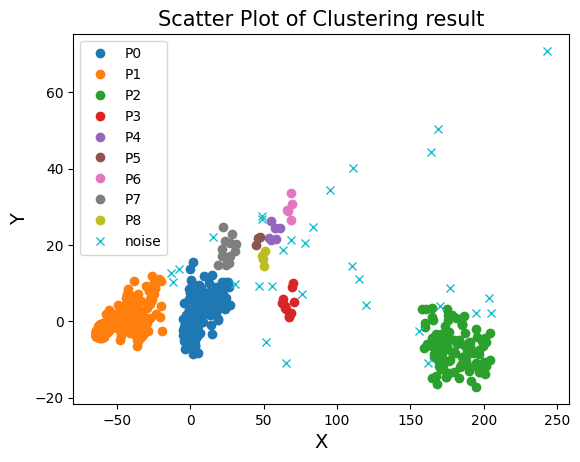

In [46]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('D:\\Machine Learning\\K-Mean\\data\\Sales_Transactions_Dataset_Weekly.csv')

features = df.iloc[:, 1:53]

pca = PCA(n_components=2)
x = pca.fit_transform(features)

dbscan = DBSCAN(x, epsilon=4.2, minpts=3)  
idx, noise = dbscan.run()
g_cluster, n_cluster = dbscan.sort()
dbscan.plot()

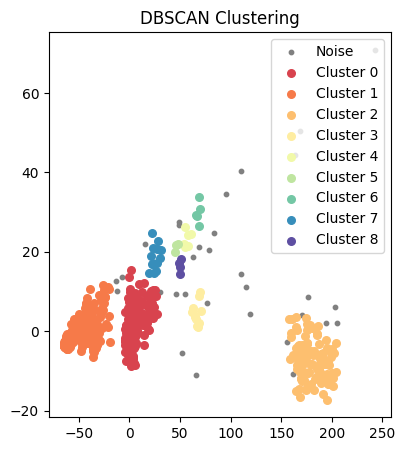

In [47]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

features = df.iloc[:, 1:53]

pca = PCA(n_components=2)
X = pca.fit_transform(features)

dbscan = DBSCAN(eps=4.2, min_samples=3)
dbscan_labels = dbscan.fit_predict(X)

plt.figure(figsize=(15, 5))

plt.subplot(131)
unique_labels_dbscan = np.unique(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_dbscan)))

for label, color in zip(unique_labels_dbscan, colors):
    if label == -1:
        plt.scatter(X[dbscan_labels == label][:, 0], X[dbscan_labels == label][:, 1], color='gray', s=10, label='Noise')
    else:
        plt.scatter(X[dbscan_labels == label][:, 0], X[dbscan_labels == label][:, 1], color=color, s=30, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.legend()